# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Taufik Hidayat
- **Email:** ataufikhidayat21@gmail.com
- **ID Dicoding:** kaitohiroi

## Data Understanding

- Dataset ini berisi data polutan udara yang diukur setiap jam dari 12 stasiun pemantauan kualitas udara yang dikontrol secara nasional di Beijing.
- Periode pengambilan data berlangsung dari 1 Maret 2013 hingga 28 Februari 2017.
- Dataset ini memberikan informasi yang penting untuk memahami hubungan antara faktor-faktor meteorologi dan tingkat polusi udara di Beijing selama empat tahun.

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara polutan PM2.5 dengan polutan lainnya seperti NO2 dan O3, dan apakah ada pola yang menunjukkan keterkaitan antar polutan tersebut?
- Faktor meteorologi mana (seperti suhu, kecepatan angin, curah hujan, dll.) yang paling berpengaruh terhadap peningkatan atau penurunan polusi udara?
- Di lingkungan stasiun manakah yang daerahnya memiliki konsentrasi PM2.5 dan PM10 tertinggi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

## Data Wrangling

### Gathering Data

In [2]:
aotizhongxin_df = pd.read_csv("https://raw.githubusercontent.com/taufikhidyt/Dicoding_Project/main/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [3]:
changping_df = pd.read_csv("https://raw.githubusercontent.com/taufikhidyt/Dicoding_Project/main/PRSA_Data_Changping_20130301-20170228.csv")

In [4]:
dingling_df = pd.read_csv("https://raw.githubusercontent.com/taufikhidyt/Dicoding_Project/main/PRSA_Data_Dingling_20130301-20170228.csv")

In [5]:
dongsi_df = pd.read_csv("https://raw.githubusercontent.com/taufikhidyt/Dicoding_Project/main/PRSA_Data_Dongsi_20130301-20170228.csv")

In [6]:
guanyuan_df = pd.read_csv("https://raw.githubusercontent.com/taufikhidyt/Dicoding_Project/main/PRSA_Data_Guanyuan_20130301-20170228.csv")

In [7]:
gucheng_df = pd.read_csv("https://raw.githubusercontent.com/taufikhidyt/Dicoding_Project/main/PRSA_Data_Gucheng_20130301-20170228.csv")

In [8]:
huairou_df = pd.read_csv("https://raw.githubusercontent.com/taufikhidyt/Dicoding_Project/main/PRSA_Data_Huairou_20130301-20170228.csv")

In [9]:
nongzhanguan_df = pd.read_csv("https://raw.githubusercontent.com/taufikhidyt/Dicoding_Project/main/PRSA_Data_Nongzhanguan_20130301-20170228.csv")

In [10]:
shunyi_df = pd.read_csv("https://raw.githubusercontent.com/taufikhidyt/Dicoding_Project/main/PRSA_Data_Shunyi_20130301-20170228.csv")

In [11]:
tiantan_df = pd.read_csv("https://raw.githubusercontent.com/taufikhidyt/Dicoding_Project/main/PRSA_Data_Tiantan_20130301-20170228.csv")

In [12]:
combined_1 = pd.concat([changping_df, aotizhongxin_df], ignore_index=True)
combined_2 = pd.concat([dingling_df, dongsi_df], ignore_index=True)
combined_3 = pd.concat([guanyuan_df, gucheng_df], ignore_index=True)
combined_4 = pd.concat([huairou_df, nongzhanguan_df], ignore_index=True)
combined_5 = pd.concat([shunyi_df, tiantan_df], ignore_index=True)
all_df = pd.concat([combined_1, combined_2, combined_3, combined_4, combined_5], ignore_index=True)

In [13]:
all_df.sample(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
34130,34131,2017,1,21,2,51.0,54.0,37.0,22.0,100.0,9.0,-8.74,1018.0,-19.9,0.0,NW,1.4,Changping
445,446,2013,3,19,13,53.0,60.0,3.0,42.0,900.0,16.0,2.40,1004.6,0.9,0.1,WNW,1.0,Changping
309776,29265,2016,7,2,8,68.0,69.0,2.0,26.0,800.0,35.0,24.30,1002.6,19.1,0.0,NNE,1.2,Shunyi
156219,15964,2014,12,26,3,115.0,167.0,84.0,111.0,4900.0,3.0,-2.10,1020.0,-9.9,0.0,NE,1.9,Guanyuan
151604,11349,2014,6,16,20,124.0,127.0,2.0,31.0,1100.0,192.0,26.80,995.3,20.4,0.0,SSW,0.8,Guanyuan
167527,27272,2016,4,10,7,44.0,198.0,19.0,74.0,1000.0,7.0,8.00,1012.8,-3.8,0.0,E,1.1,Guanyuan
198121,22802,2015,10,7,1,285.0,285.0,2.0,91.0,1700.0,12.0,17.40,1007.3,16.1,0.0,NW,0.1,Gucheng
93958,23831,2015,11,18,22,72.0,79.0,5.0,46.0,1000.0,2.0,4.10,1016.7,1.3,0.0,NNW,0.8,Dingling
154061,13806,2014,9,27,5,8.0,8.0,2.0,20.0,300.0,53.0,14.60,1010.9,11.2,0.0,ESE,0.7,Guanyuan
45272,10209,2014,4,30,8,149.0,241.0,19.0,133.0,1200.0,2.0,19.80,1005.2,11.3,0.0,ENE,1.2,Aotizhongxin


**Insight:**
- Data yang diberikan oleh Dicoding merupakan data kualitas udara yang diukur dari berbagai stasiun di Beijing.
- Namun demikian, data diberikan dalam tabel secara terpisah berdasarkan stasiun tempat pengukuran kualitas udara.
- Untuk memudahkan proses analisis sesuai dengan tujuan bisnis yang saya nyatakan, saya menggabungkan setiap tabel menjadi `all_df`.
- Selain itu, kolom-kolom pada data yang diberikan dapat dideskripsikan sebagai berikut.

|No.|Kolom|Deskripsi|
|:-|:-| :-|
|1.|No|Nomor identifikasi unik untuk data ini|
|2.|year|Tahun data diukur|
|3.|month|Bulan data diukur|
|4.|day|Hari data diukur|
|5.|hour|Jam data diukur|
|6.|PM2.5|Konsentrasi PM2.5 (ug/m^3).|
|7.|PM10|Konsentrasi PM10 (ug/m^3).|
|8.|SO2|Konsentrasi SO2 (ug/m^3).|
|9.|NO2|Konsentrasi NO2 (ug/m^3).|
|11.|CO|Konsentrasi CO (ug/m^3).|
|12.|O3|Konsentrasi O3 (ug/m^3).|
|13.|TEMP|Suhu (derajat Celsius).|
|14.|PRES|Tekanan udara (hPa).|
|15.|DWEP|Suhu titik embun (derajat Celsius).|
|14.|RAIN|Curah hujan (mm).|
|14.|wd|Arah angin|
|14.|WSPM|Kecepatan angin (m/s).|
|14.|station|Nama lokasi stasiun pemantauan kualitas udara.|

- Pada analisis ini, **kolom `PM2.5`, `PM10`, `NO2`, `O3`, `SO2`, `CO`, dan `O3` dikelompokkan sebagai kolom `pollutans` serta kolom `TEMP`, `PRES`, `DEWP`, `RAIN`, dan `WSPM` dikelompokkan sebagai kolom `factors**.

- Hal-hal yang perlu diketahui agar memudahkan analisis
  - `PM2.5` dan `PM10`: Partikel debu dengan diameter kurang dari 2.5 dan 10 mikrometer. Partikel ini sangat berbahaya karena dapat masuk jauh ke dalam saluran pernapasan.
  - `SO2`, `NO2`, `CO`, `O3`: Gas polutan yang umumnya dihasilkan dari pembakaran bahan bakar fosil.

### Assessing Data

In [14]:
all_df.shape

(350640, 18)

In [15]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350640 entries, 0 to 350639
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       350640 non-null  int64  
 1   year     350640 non-null  int64  
 2   month    350640 non-null  int64  
 3   day      350640 non-null  int64  
 4   hour     350640 non-null  int64  
 5   PM2.5    342979 non-null  float64
 6   PM10     344959 non-null  float64
 7   SO2      342863 non-null  float64
 8   NO2      340348 non-null  float64
 9   CO       333048 non-null  float64
 10  O3       340548 non-null  float64
 11  TEMP     350281 non-null  float64
 12  PRES     350286 non-null  float64
 13  DEWP     350276 non-null  float64
 14  RAIN     350289 non-null  float64
 15  wd       349020 non-null  object 
 16  WSPM     350349 non-null  float64
 17  station  350640 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 48.2+ MB


Terdapat kesalahan tipe data pada kolom `year`, `month`, `day`, `hour`.

In [16]:
all_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,7661
PM10,5681
SO2,7777
NO2,10292
CO,17592


In [17]:
print("Jumlah duplikasi: ", all_df.duplicated().sum())

Jumlah duplikasi:  0


In [18]:
nums = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
        'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

<ipython-input-19-542d6351bfc9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=all_df[nums[i]], palette='Spectral')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
<ipython-input-19-542d6351bfc9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend

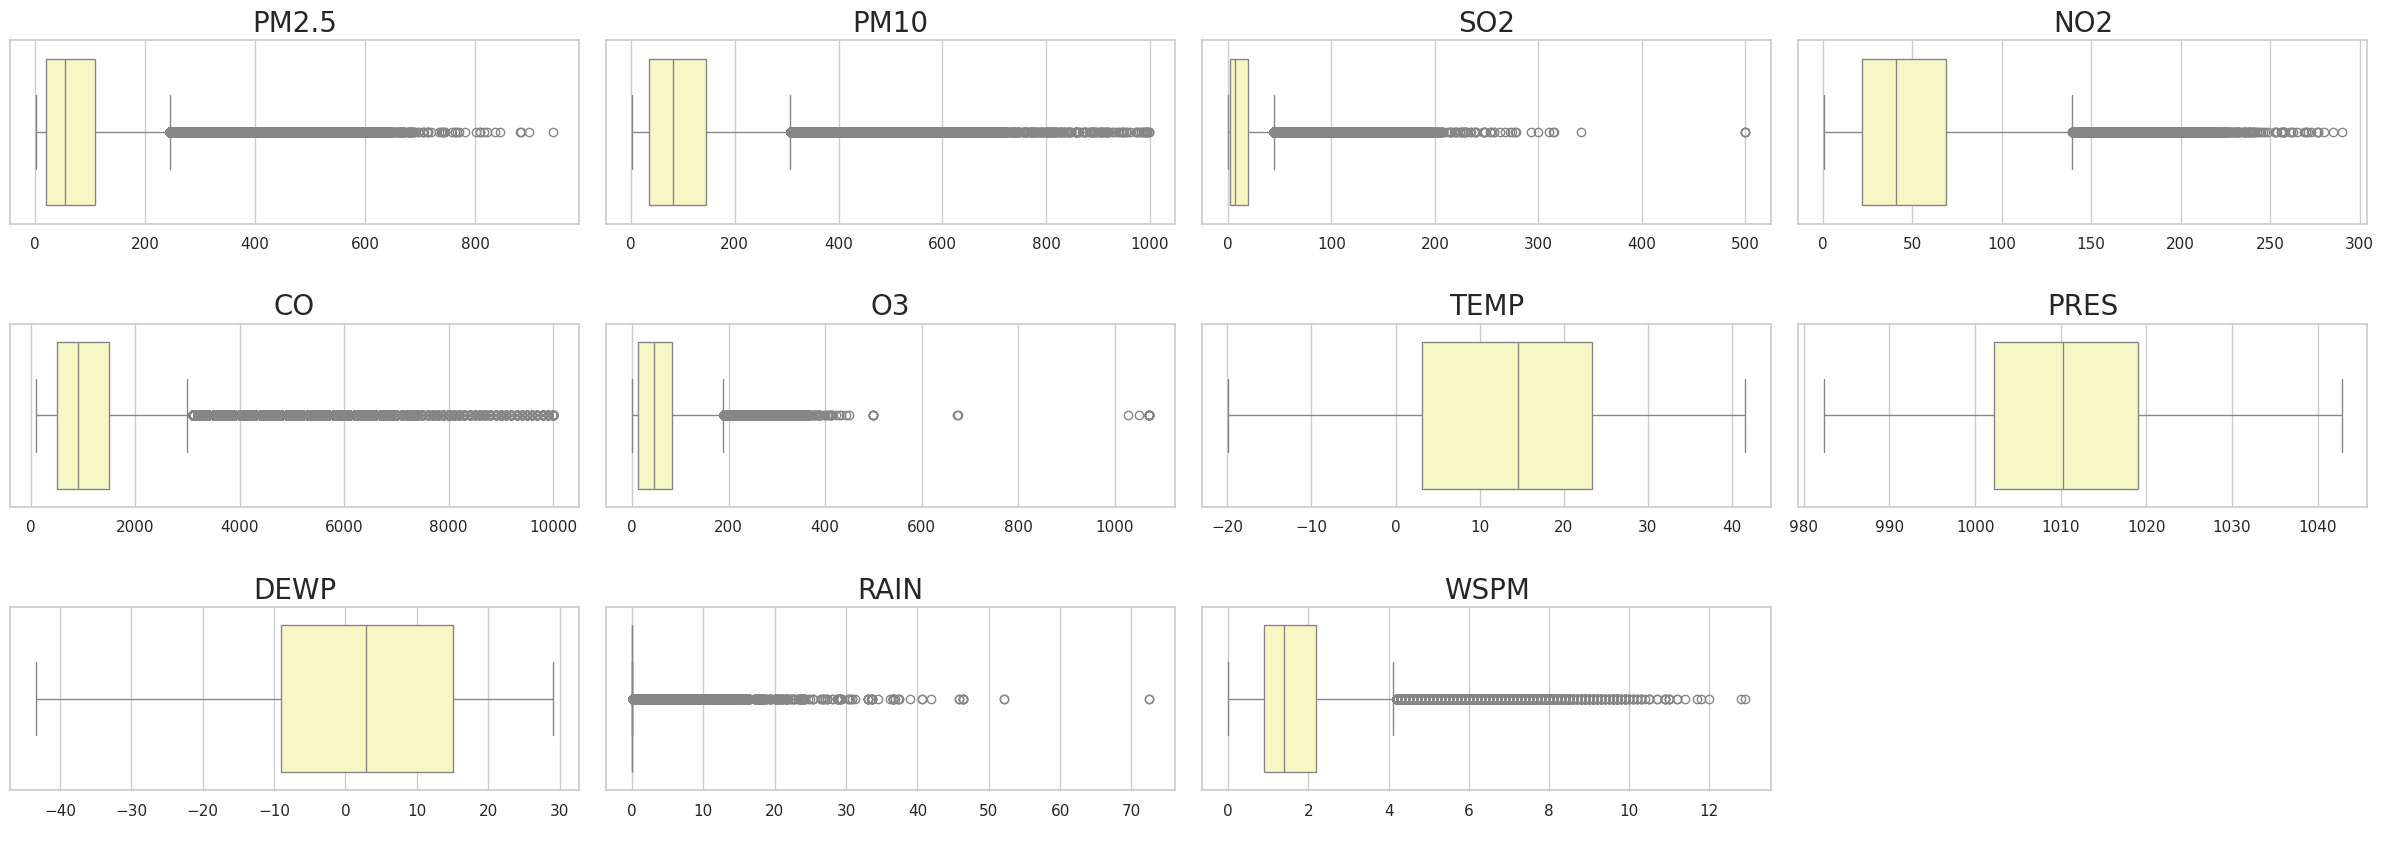

In [19]:
plt.figure(figsize=(24,28))
for i in range(0,len(nums)):
    plt.subplot(10,4,i+1)
    sns.boxplot(x=all_df[nums[i]], palette='Spectral')
    plt.title(nums[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

In [20]:
all_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,350640.000000,350640.000000,350640.000000,350640.000000,350640.000000,342979.000000,344959.000000,342863.000000,340348.000000,333048.000000,340548.000000,350281.000000,350286.000000,350276.000000,350289.000000,350349.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,78.907149,103.247648,15.442571,48.685266,1207.765160,58.308746,13.525430,1010.635393,2.391536,0.064112,1.751009
std,10122.119349,1.177198,3.448708,8.800105,6.922196,80.146835,91.003205,21.284513,34.359714,1140.773269,56.696948,11.449818,10.472191,13.811646,0.815430,1.261342
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,35.000000,2.000000,22.000000,500.000000,12.000000,3.100000,1002.200000,-9.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,54.000000,81.000000,7.000000,41.000000,900.000000,46.000000,14.500000,1010.300000,2.900000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,110.000000,144.000000,19.000000,69.000000,1500.000000,83.000000,23.300000,1019.000000,15.000000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,12.900000


**Insight:**
- Pada tabel `all_df`, kolom `year`, `month`, `day`, `hour` bertipe data `int64`. Disini terdapat ketidaksesuaian, harusnya keempat kolom tersebut `datetime`. Penyelesaian untuk permasalahan ini akan dibahas pada bagian Cleaning Data.
- Terdapat data kosong pada semua kolom `pollutans` dan `factors`, data kosong juga terdapat pada kolom `wd`. Permasalahan data kosong ini akan diselesaikan pada bagian Cleaning Data.
- Boxplot menunjukan bahwa terdapat outliers pada beberapa features.


### Cleaning Data

#### Drop missing values

In [21]:
missing_values = all_df[all_df.isnull().any(axis=1)]
missing_values

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
26,27,2013,3,2,2,13.0,9.0,NaN,56.0,800.0,33.0,-1.7,1027.7,-17.4,0.0,SSW,1.5,Changping
27,28,2013,3,2,3,14.0,24.0,23.0,42.0,NaN,NaN,-2.5,1027.7,-17.4,0.0,SW,1.7,Changping
28,29,2013,3,2,4,14.0,18.0,24.0,NaN,400.0,45.0,-3.4,1027.5,-17.0,0.0,NW,0.8,Changping
122,123,2013,3,6,2,146.0,153.0,NaN,100.0,2399.0,81.0,3.5,1004.8,-6.5,0.0,N,0.7,Changping
123,124,2013,3,6,3,170.0,179.0,55.0,74.0,NaN,81.0,3.7,1004.7,-6.3,0.0,N,1.3,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350608,35033,2017,2,27,16,NaN,NaN,NaN,NaN,NaN,NaN,15.9,1014.0,-9.9,0.0,SW,2.9,Tiantan
350633,35058,2017,2,28,17,9.0,37.0,NaN,NaN,NaN,NaN,14.2,1012.5,-14.9,0.0,NW,3.1,Tiantan
350634,35059,2017,2,28,18,15.0,43.0,NaN,NaN,NaN,NaN,13.4,1013.0,-15.5,0.0,WNW,1.4,Tiantan
350635,35060,2017,2,28,19,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4,Tiantan


In [22]:
all_df.dropna(inplace=True)

#### Memperbaiki tipe data kolom yang tidak sesuai

In [23]:
all_df['datetime'] = pd.to_datetime(all_df[['year', 'month', 'day', 'hour']])

#### Drop irrelevant columns

In [24]:
all_df.drop(['year', 'month', 'day', 'hour','No'], inplace=True, axis=1)
all_df.sample(10)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
341387,29.0,29.0,12.0,57.0,1100.0,27.0000,5.4,1020.0,-12.1,0.0,E,1.4,Tiantan,2016-02-09 11:00:00
275085,102.0,103.0,2.0,42.0,2700.0,173.0000,28.5,1003.2,18.9,0.0,SSW,1.6,Nongzhanguan,2016-07-17 21:00:00
337773,20.0,25.0,2.0,41.0,500.0,24.0000,15.6,1011.7,13.3,0.0,WNW,1.9,Tiantan,2015-09-11 21:00:00
251751,7.0,28.0,4.0,10.0,200.0,54.4068,8.2,1020.8,-16.2,0.0,NNW,3.3,Nongzhanguan,2013-11-18 15:00:00
60008,12.0,23.0,3.0,30.0,600.0,50.0000,-2.1,1027.0,-13.6,0.0,NE,2.1,Aotizhongxin,2016-01-04 08:00:00
57130,16.0,27.0,2.0,23.0,500.0,59.0000,23.7,1010.8,16.2,0.0,NNE,1.7,Aotizhongxin,2015-09-06 10:00:00
230367,3.0,5.0,2.0,2.0,400.0,71.0000,27.4,987.5,9.2,0.0,NW,2.6,Huairou,2015-06-11 15:00:00
198002,21.0,46.0,2.0,52.0,700.0,2.0000,11.6,1004.9,7.3,0.0,WNW,0.8,Gucheng,2015-10-02 02:00:00
109759,93.0,107.0,9.0,80.0,2300.0,11.0000,20.2,1014.0,18.3,0.0,NE,1.5,Dongsi,2013-09-07 07:00:00
309916,57.0,57.0,2.0,18.0,700.0,26.0000,24.6,1006.4,20.3,0.0,SE,2.9,Shunyi,2016-07-08 04:00:00


In [25]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318766 entries, 0 to 350639
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   PM2.5     318766 non-null  float64       
 1   PM10      318766 non-null  float64       
 2   SO2       318766 non-null  float64       
 3   NO2       318766 non-null  float64       
 4   CO        318766 non-null  float64       
 5   O3        318766 non-null  float64       
 6   TEMP      318766 non-null  float64       
 7   PRES      318766 non-null  float64       
 8   DEWP      318766 non-null  float64       
 9   RAIN      318766 non-null  float64       
 10  wd        318766 non-null  object        
 11  WSPM      318766 non-null  float64       
 12  station   318766 non-null  object        
 13  datetime  318766 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 36.5+ MB


In [26]:
all_df.to_csv('all_df.csv', index=False)

**Insight:**
- Dilakukan penghapusan data kosong yang telah diidentifikasi sebelumnya. Penghapusan data ini dilakukan atas dasar pertimbangan bahwa jumlah data kosong relatif kecil jika dibandingkan dengan keseluruhan data.
- Dibuat kolom `datetime` dari gabungan kolom `year`, `month`, `day`, dan `hour`. Kolom ini dibuat untuk menyederhanakan dan membuat tipe datanya menjadi sesuai.
- Outliers tidak dihapus karena potensial dapat menghilangkan informasi yang valid, terutama jika outliers tersebut disebabkan oleh fenomena yang memang terjadi. Contohnya, kosentrasi polutan sangat mungkin untuk mengalami lonjakan.


## Exploratory Data Analysis (EDA)

### Distribusi *numerical features*

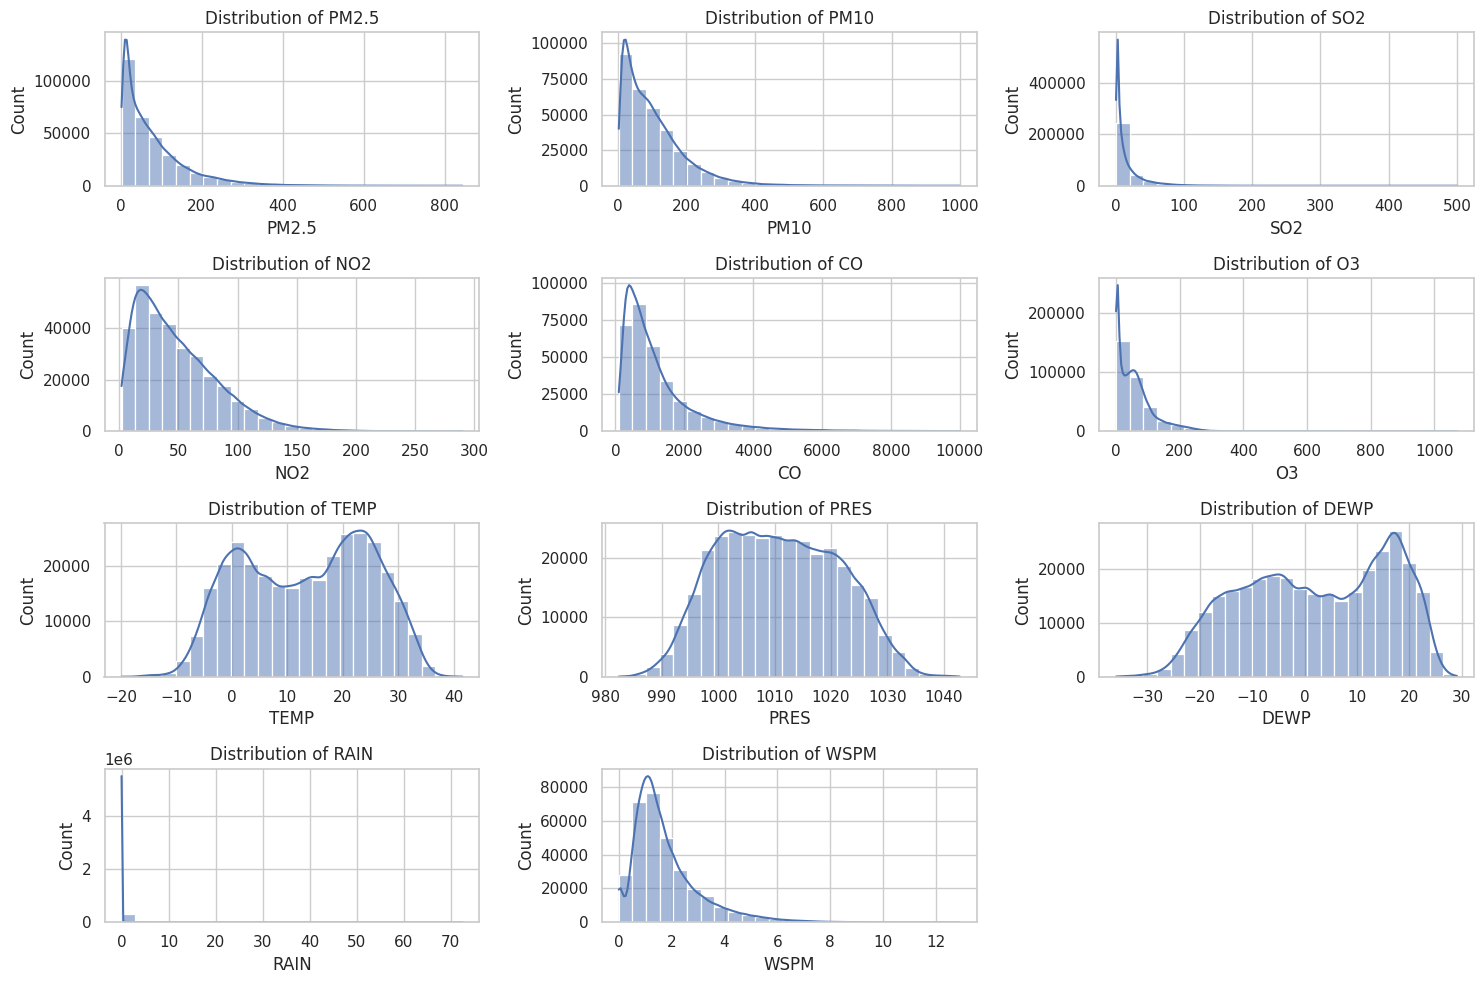

In [27]:
plt.figure(figsize=(15, 10))  # Mengatur ukuran figure
for i, col in enumerate(nums, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=all_df, x=col, kde=True, bins=25)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

### Eksplor hubungan antar *feature*

In [28]:
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']

In [29]:
factors = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

In [30]:
corr = all_df[factors + pollutants].corr()
corr

,TEMP,PRES,DEWP,RAIN,WSPM,PM2.5,PM10,NO2,SO2,CO,O3
TEMP,1.000000,-0.809641,0.820583,0.037455,0.027679,-0.124196,-0.088154,-0.276064,-0.319229,-0.316931,0.596080
PRES,-0.809641,1.000000,-0.746550,-0.061049,0.069767,0.013530,-0.023729,0.181530,0.222788,0.182629,-0.447568
DEWP,0.820583,-0.746550,1.000000,0.087077,-0.295324,0.122460,0.076375,-0.030621,-0.265865,-0.047795,0.313849
RAIN,0.037455,-0.061049,0.087077,1.000000,0.022270,-0.015432,-0.026423,-0.043017,-0.040962,-0.012557,0.023682
WSPM,0.027679,0.069767,-0.295324,0.022270,1.000000,-0.276018,-0.181820,-0.395408,-0.111406,-0.297249,0.292082
PM2.5,-0.124196,0.013530,0.122460,-0.015432,-0.276018,1.000000,0.884044,0.672260,0.478055,0.793365,-0.145785
PM10,-0.088154,-0.023729,0.076375,-0.026423,-0.181820,0.884044,1.000000,0.651549,0.458604,0.702347,-0.106916
NO2,-0.276064,0.181530,-0.030621,-0.043017,-0.395408,0.672260,0.651549,1.000000,0.497878,0.709580,-0.470007
SO2,-0.319229,0.222788,-0.265865,-0.040962,-0.111406,0.478055,0.458604,0.497878,1.000000,0.530408,-0.163062
CO,-0.316931,0.182629,-0.047795,-0.012557,-0.297249,0.793365,0.702347,0.709580,0.530408,1.000000,-0.313027


### Eksplor stasiun dengan tingkat polusi tinggi

In [31]:
station_pm_avg = all_df.groupby('station')[['PM2.5']].mean().reset_index()
station_pm_avg = station_pm_avg.sort_values(by='PM2.5', ascending=False)
station_pm_avg

,station,PM2.5
3,Dongsi,84.933156
7,Nongzhanguan,84.720783
5,Gucheng,83.865653
4,Guanyuan,83.101051
0,Aotizhongxin,81.863630
9,Tiantan,81.749840
8,Shunyi,79.400725
1,Changping,70.312328
6,Huairou,70.285669
2,Dingling,66.512518


In [32]:
station_pm_avg1 = all_df.groupby('station')[['PM10']].mean().reset_index()
station_pm_avg1 = station_pm_avg1.sort_values(by='PM10', ascending=False)
station_pm_avg1

,station,PM10
5,Gucheng,119.085002
3,Dongsi,110.991914
7,Nongzhanguan,109.175929
0,Aotizhongxin,109.120685
4,Guanyuan,108.974559
9,Tiantan,105.627866
8,Shunyi,99.380546
1,Changping,94.086402
6,Huairou,92.525792
2,Dingling,84.527803


Karena stasiun Gucheng dan Dongsi berturut-turut merupakan stasiun dengan rata-rata konsentrasi PM10 dan PM2.5 tertinggi, saya tertarik untuk mengeskplor fluktuasi PM10 dan PM2.5  di kedua stasiun tersebut.

### Eksplor tabel `dongsi_df`

In [33]:
dongsi_df['datetime'] = pd.to_datetime(dongsi_df[['year', 'month', 'day', 'hour']])
dongsi_df.drop(['year', 'month', 'day', 'hour','No'], inplace=True, axis=1)

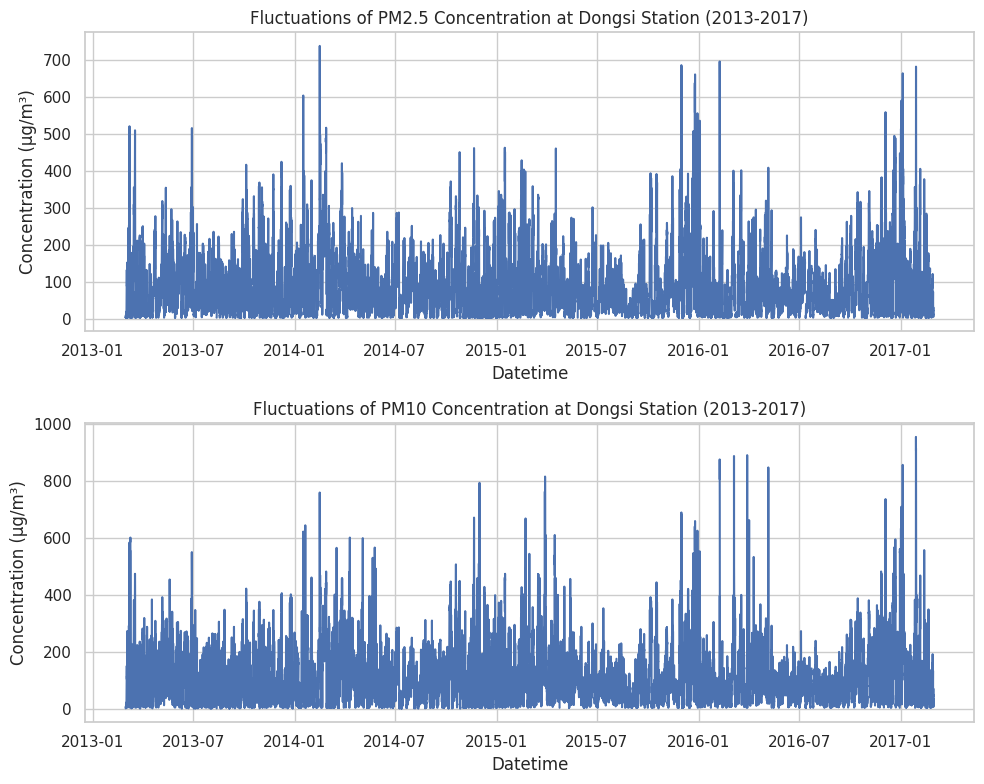

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
axes[0].plot(dongsi_df['datetime'], dongsi_df['PM2.5'])
axes[0].set_title('Fluctuations of PM2.5 Concentration at Dongsi Station (2013-2017)')
axes[0].set_xlabel('Datetime')
axes[0].set_ylabel('Concentration (μg/m³)')
axes[1].plot(dongsi_df['datetime'], dongsi_df['PM10'])
axes[1].set_title('Fluctuations of PM10 Concentration at Dongsi Station (2013-2017)')
axes[1].set_xlabel('Datetime')
axes[1].set_ylabel('Concentration (μg/m³)')
plt.tight_layout()
plt.show()

### Eksplor tabel `gucheng_df`

In [35]:
gucheng_df['datetime'] = pd.to_datetime(gucheng_df[['year', 'month', 'day', 'hour']])
gucheng_df.drop(['year', 'month', 'day', 'hour','No'], inplace=True, axis=1)

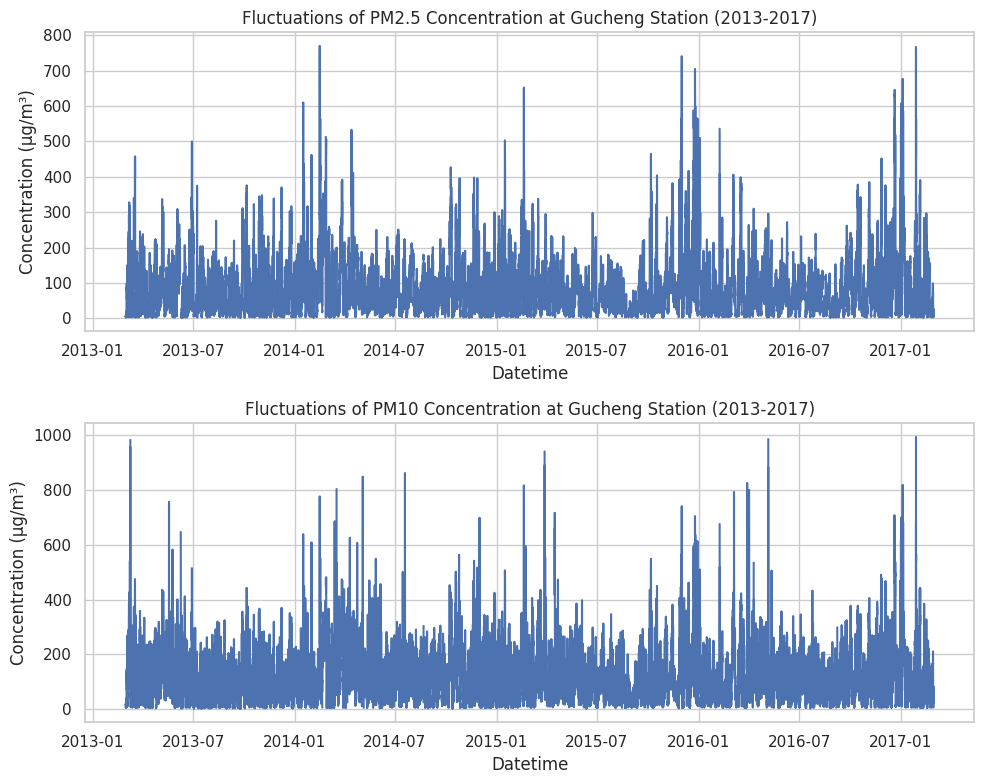

In [36]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
axes[0].plot(gucheng_df['datetime'], gucheng_df['PM2.5'])
axes[0].set_title('Fluctuations of PM2.5 Concentration at Gucheng Station (2013-2017)')
axes[0].set_xlabel('Datetime')
axes[0].set_ylabel('Concentration (μg/m³)')
axes[1].plot(gucheng_df['datetime'], gucheng_df['PM10'])
axes[1].set_title('Fluctuations of PM10 Concentration at Gucheng Station (2013-2017)')
axes[1].set_xlabel('Datetime')
axes[1].set_ylabel('Concentration (μg/m³)')
plt.tight_layout()
plt.show()

**Insight:**
- Kolom-kolom polutan seperti `PM2.5`, `PM10`, `NO2`, `SO2`, `CO`, dan `O3` memiliki distribusi yang cenderung condong ke kanan (right-skewed), artinya sebagian besar data terkonsentrasi pada nilai yang lebih rendah, namun terdapat beberapa nilai ekstrim yang sangat tinggi. Hal ini mengindikasikan adanya masalah polusi udara yang serius di beberapa wilayah atau waktu tertentu di Beijing.
- Terdapat beberepa koefisien korelasi positif yang tinggi antar polutan, salah satu contohnya: `PM.25` dengan fitur `PM10`, `NO2`, `SO2`, `CO`, dan `O3`. Koefisien korelasi yang tinggi menunjukan kuatnya hubungan antara keduanya.
- Stasiun dengan rata-rata konsentrasi PM2.5 tertinggi adalah Stasiun Dongsi dan stasiun dengan rata-rata konsentrasi PM10 tertinggi adalah Stasiun Gucheng.
- Konsentrasi PM2.5 dan PM10 pada kedua stasiun mengalami perubahan yang sangat signifikan dari waktu ke waktu, menunjukkan adanya faktor-faktor yang sangat mempengaruhi tingkat polusi partikulat di wilayah tersebut.
- Terdapat beberapa puncak konsentrasi PM2.5 dan PM10 yang sangat tinggi, mengindikasikan adanya peristiwa tertentu (misalnya, kebakaran hutan, aktivitas industri yang meningkat) yang menyebabkan peningkatan drastis polusi.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hubungan antara polutan PM2.5 dengan polutan lainnya seperti NO2 dan O3, dan apakah ada pola yang menunjukkan keterkaitan antar polutan tersebut?

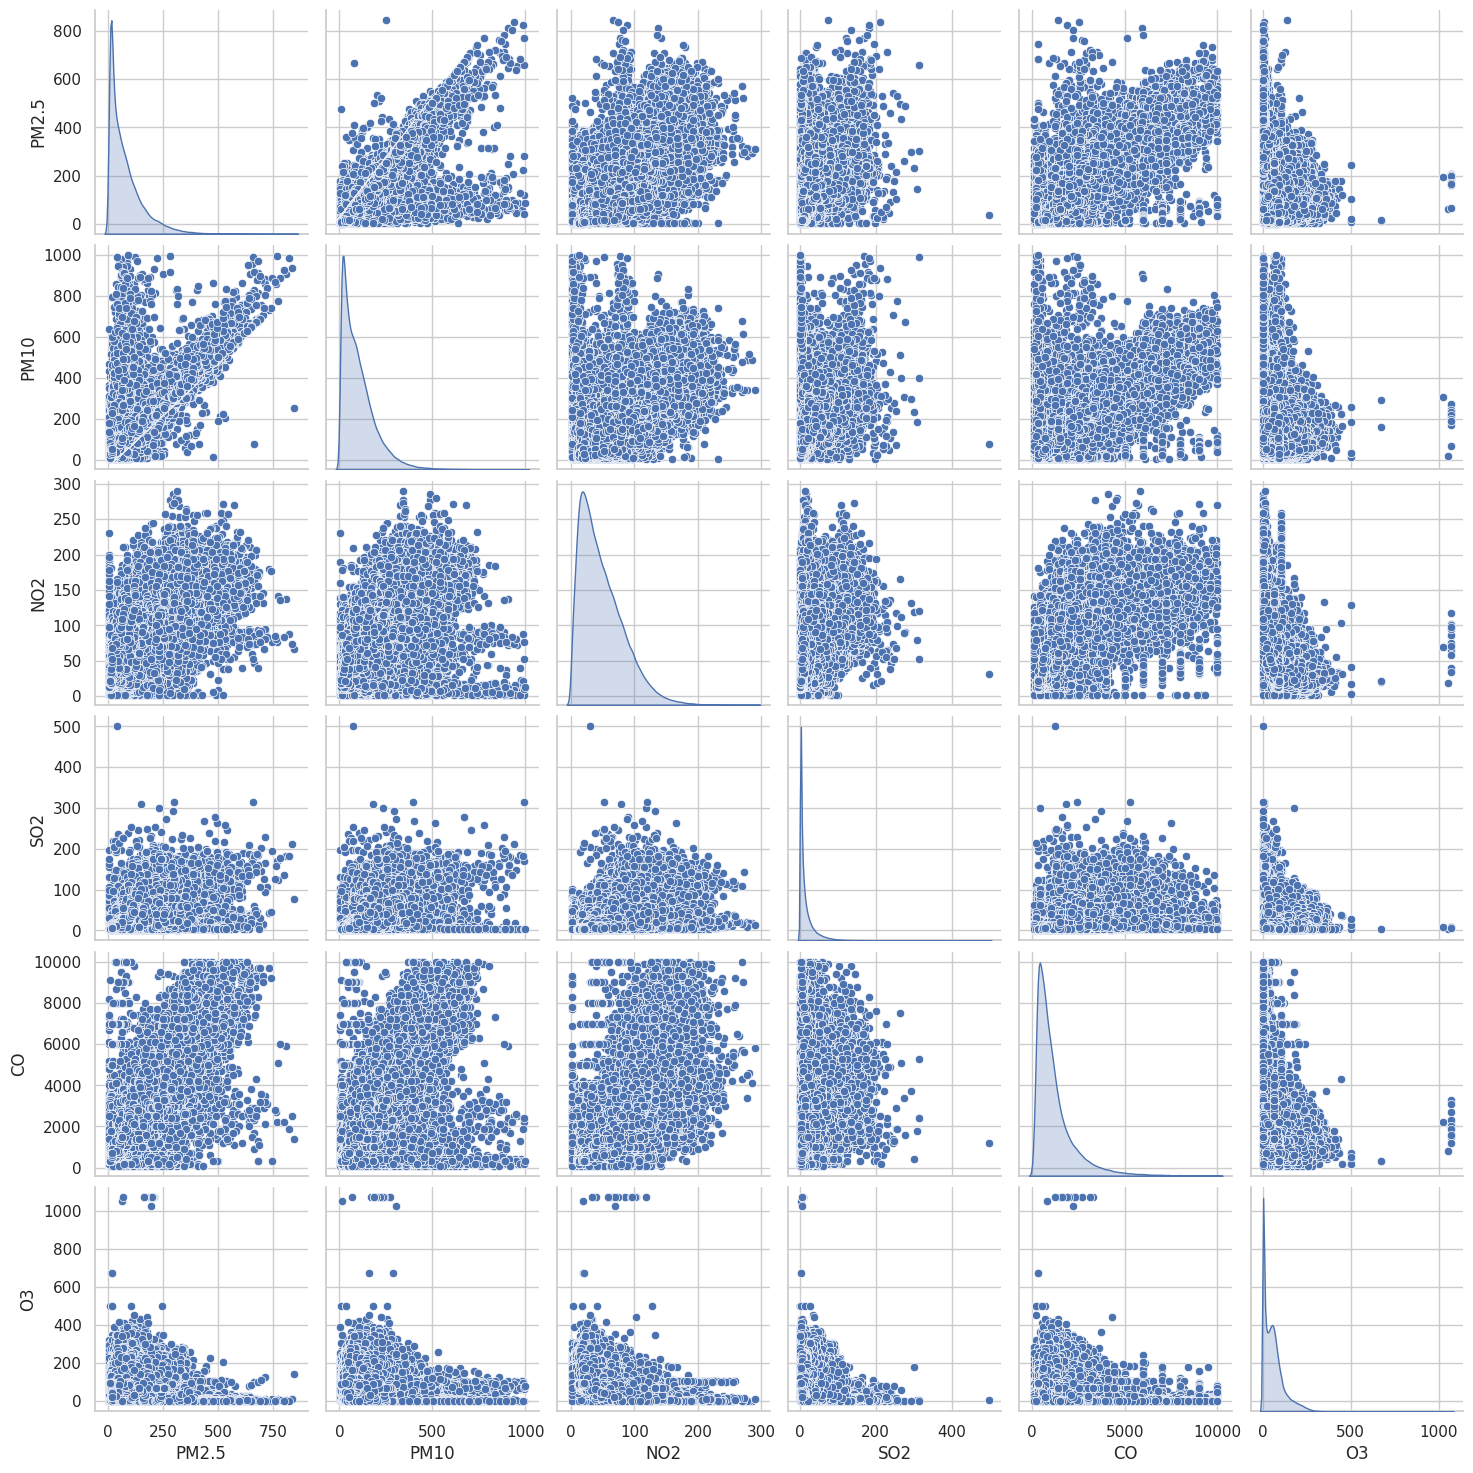

In [37]:
sns.pairplot(all_df[pollutants], kind="scatter", diag_kind="kde")
plt.show()

### Pertanyaan 2: Faktor meteorologi mana (seperti suhu, kecepatan angin, curah hujan, dll.) yang paling berpengaruh terhadap peningkatan atau penurunan polusi udara?

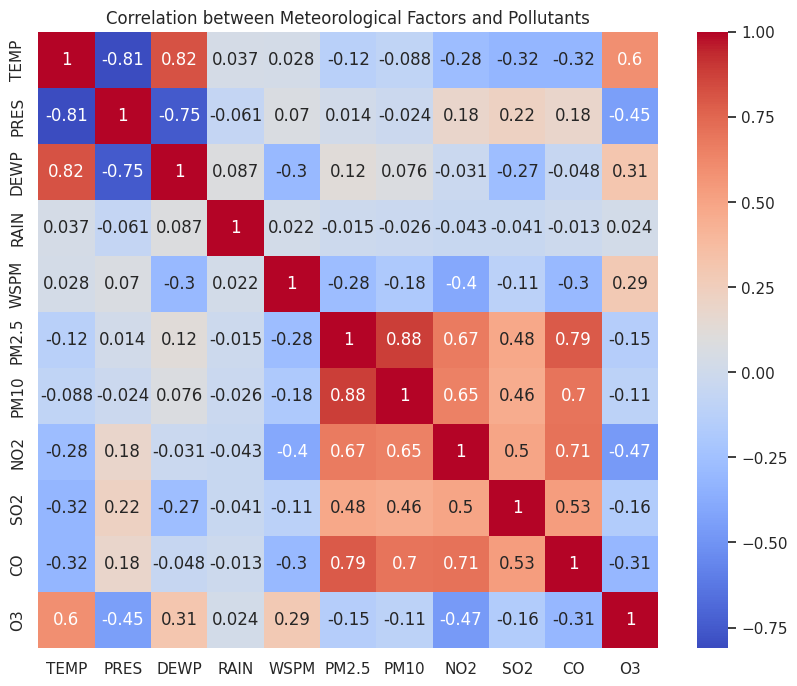

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Meteorological Factors and Pollutants')
plt.show()

### Pertanyaan 3: Di lingkungan stasiun manakah yang daerahnya memiliki konsentrasi PM2.5 dan PM10 tertinggi?

<ipython-input-39-6cf9cc90c072>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PM2.5', y='station', data=station_pm_avg, palette='plasma', label="PM2.5", alpha=0.8)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: Futur

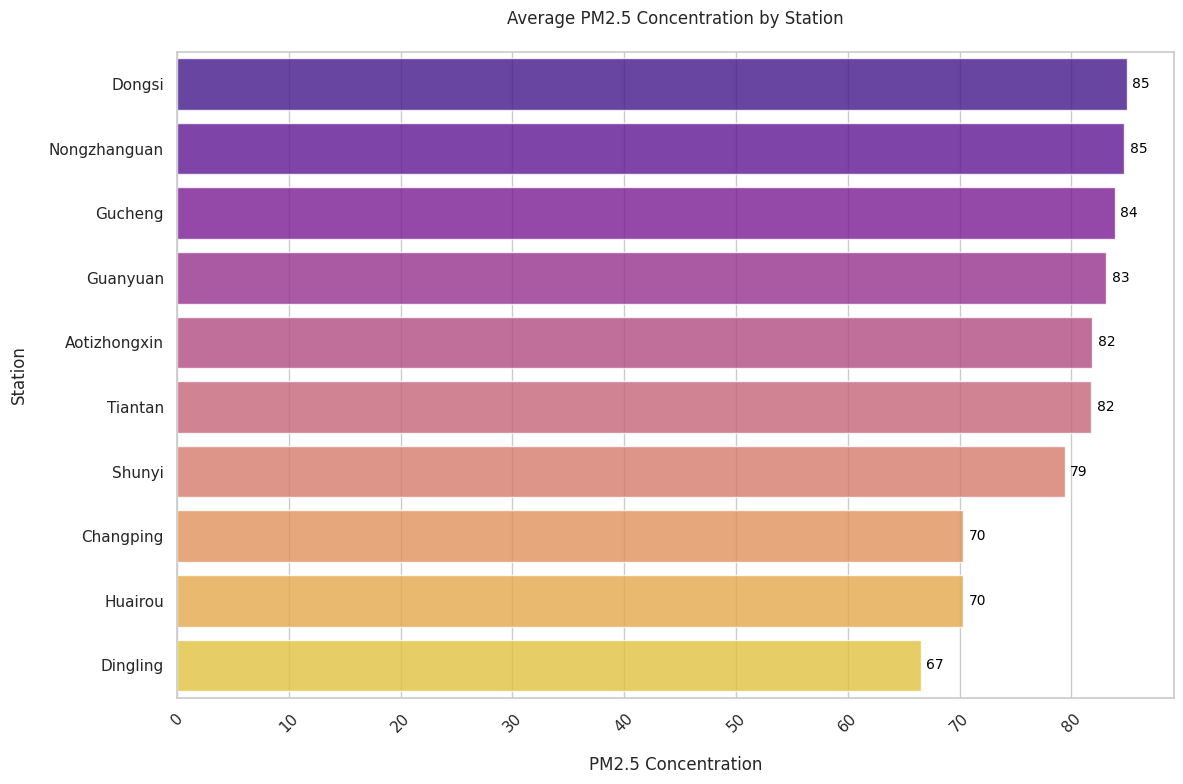

In [39]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(x='PM2.5', y='station', data=station_pm_avg, palette='plasma', label="PM2.5", alpha=0.8)

for bar in ax.patches:
    bar_value = bar.get_width()
    text = f'{bar_value:,.0f}'
    text_x = bar.get_width() + 0.5
    text_y = bar.get_y() + bar.get_height() / 2
    ax.text(text_x, text_y, text, ha='left', va='center', color='black', size=10)

ax.set_xlabel('PM2.5 Concentration', labelpad=15)
ax.set_ylabel('Station', labelpad=15)
plt.title("Average PM2.5 Concentration by Station", pad=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-40-830e9bd3b9c3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PM10', y='station', data=station_pm_avg1, palette='plasma', label="PM10", alpha=0.8)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: Future

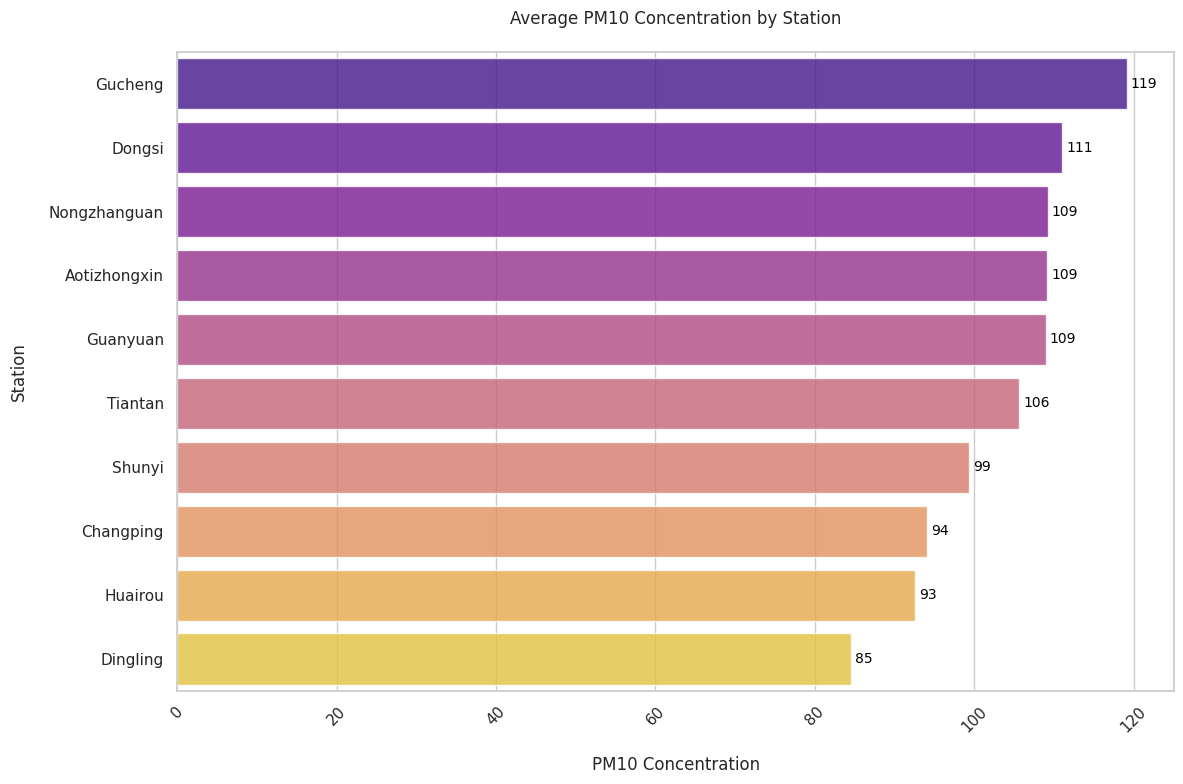

In [40]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(x='PM10', y='station', data=station_pm_avg1, palette='plasma', label="PM10", alpha=0.8)

for bar in ax.patches:
    bar_value = bar.get_width()
    text = f'{bar_value:,.0f}'
    text_x = bar.get_width() + 0.5
    text_y = bar.get_y() + bar.get_height() / 2
    ax.text(text_x, text_y, text, ha='left', va='center', color='black', size=10)

ax.set_xlabel('PM10 Concentration', labelpad=15)
ax.set_ylabel('Station', labelpad=15)
plt.title("Average PM10 Concentration by Station", pad=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
- Pola keterkaitan antar polutan:
  - Kedua polutan partikulat, yakni PM2.5 dan PM10 memiliki pola hubungan linear yang positif. Hal ini mengindikasikan keduanya mungkin berasal dari sumber yang sama atau dipengaruhi oleh kondisi lingkungan yang serupa.
  - Terlihat bahwa konsentrasi CO memiliki hubungan yang kuat dengan PM2.5 dan PM10. Hal ini bisa menunjukkan bahwa CO berasal dari sumber yang sama dengan polutan partikulat, seperti emisi kendaraan atau pembakaran bahan bakar fosil.
  - O3 cenderung memiliki hubungan yang negatif atau tidak jelas dengan polutan lain, terutama dengan PM2.5 dan PM10.
  - Hubungan antar polutan lain yang tidak disebutkan di tiga poin sebelumnya tidak menunjukan pola yang jelas.
- Pengaruh faktor meteorologi terhadap polutan:
  - Korelasi positif kuat antara TEMP dan O3 (+0.6), menunjukkan bahwa suhu tinggi cenderung meningkatkan konsentrasi ozon.
  - Korelasi negatif TEMP dengan PM2.5, PM10, NO2, SO2, dan CO (antara -0.12 hingga -0.32), menunjukkan bahwa suhu yang lebih tinggi cenderung menurunkan konsentrasi polutan ini.
  - WSPM memiliki korelasi negatif moderat dengan PM2.5, PM10, NO2, dan CO (antara -0.3 hingga -0.4), menunjukkan bahwa kecepatan angin yang lebih tinggi cenderung mengurangi konsentrasi polutan ini, kemungkinan karena dispersi yang lebih baik.
  - RAIN hampir tidak memiliki korelasi signifikan dengan polutan, menunjukkan bahwa hujan tidak secara langsung mempengaruhi konsentrasi polusi udara di data ini.
  - DEWP memiliki korelasi positif sedang dengan O3 (+0.31) dan korelasi negatif dengan PM2.5, PM10, dan CO (antara -0.27 hingga -0.32). Hal ini menunjukkan bahwa kelembaban tinggi cenderung sedikit meningkatkan ozon dan cenderung menurunkan polutan-partikel tersebut.
- TOP 3 stasiun dengan konsentrasi `PM2.5` tertinggi adalah:
  - Dongsi
  - Nongzhanguan
  - Gucheng
- TOP 3 stasiun dengan konsentrasi `PM10` tertinggi adalah:
  - Gucheng
  - Dongsi
  - Nongzhanguan


## Conclusion

Dari keseluruhan analisis yang telah dilakukan, dapat disimpulkan bahwa:
- PM2.5 dan PM10 memiliki hubungan linear positif, menunjukkan sumber atau kondisi lingkungan yang serupa dalam pembentukan kedua polutan ini. CO yang berkorelasi kuat dengan PM2.5 dan PM10 menandakan potensi sumber emisi yang sama, seperti pembakaran bahan bakar fosil. Sementara itu, O3 cenderung memiliki hubungan negatif dengan polutan lain, terutama PM2.5 dan PM10, mungkin karena mekanisme pembentukannya berbeda atau dipengaruhi faktor lingkungan lain.
- Temperatur yang tinggi cenderung meningkatkan konsentrasi O3 dan menurunkan polutan seperti PM2.5, PM10, dan NO2, sementara kecepatan angin (WSPM) membantu mendispersikan polutan, sehingga mengurangi konsentrasinya. Kelembaban (diwakili oleh DEWP) juga berpengaruh, dengan peningkatan kelembaban cenderung sedikit menurunkan polutan partikulat.
- Stasiun Dongsi, Nongzhanguan, dan Gucheng menunjukkan konsentrasi PM2.5 dan PM10 tertinggi, yang mungkin menandakan aktivitas emisi tinggi atau kondisi lingkungan yang mendukung akumulasi polutan di wilayah ini

Adapun terdapat rekomendasi yang diharapkan bisa menjadi solusi terkait permasalahan kualitas udara berdasarkan temuan-temuan di atas. Beberapa rekomendasi tersebut meliputi:
- Untuk mengurangi polusi udara yang berasal dari PM2.5 dan PM10, langkah pertama adalah mengendalikan sumber utamanya, seperti emisi dari kendaraan bermotor dan pembakaran bahan bakar fosil di industri. Pemerintah bisa mempertimbangkan beberapa tindakan, contohnya:
  - Membatasi penggunaan kendaraan pribadi, terutama di pusat kota, melalui kebijakan seperti "hari bebas kendaraan" pada hari-hari tertentu.
  - Memperketat aturan terkait emisi dari pabrik dan memastikan pengawasan rutin untuk mematuhi standar polusi.
- Mengingat suhu dan kecepatan angin memainkan peran penting dalam menurunkan konsentrasi polutan, pemerintah dapat memanfaatkan prakiraan cuaca dan meningkatkan pengelolaan kualitas udara saat kondisi cuaca yang mendukung polusi, seperti suhu tinggi dan rendahnya kecepatan angin. Ini bisa meliputi penerapan "hari bebas kendaraan" atau pengurangan aktivitas industri pada hari-hari tersebut.
- Wilayah sekitar stasiun Dongsi, Nongzhanguan, dan Gucheng perlu menjadi fokus utama dalam pengendalian polusi. Intervensi seperti penanaman lebih banyak vegetasi, peningkatan sistem filtrasi udara, atau kebijakan pengurangan emisi lokal dapat membantu mengurangi dampak buruk kualitas udara pada kesehatan masyarakat di daerah tersebut.

**Referensi**:

https://www.kaggle.com/datasets/aravindpcoder/beijing-multi-site-air-quality-data